# 미니 프로젝트 : Rock_Scissor_Paper

## PIL 라이브러리 불러오기

In [1]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


## 이미지 사이즈 변경

#### 가위 - 이미지의 크기 28x28로 변경하기

In [2]:
import os
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


#### 바위 - 이미지의 크기 28x28로 변경하기

In [3]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


#### 보 - 이미지의 크기 28x28로 변경하기

In [4]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


## 데이터읽기 및 라벨링

In [5]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


## 이미지 불러오기 (x_train[0])

라벨:  0


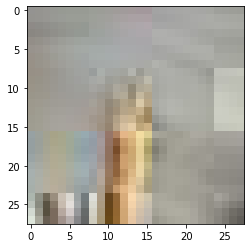

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 네트워크 설계하기
### 모델 만들기

In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (

## 네트워크 모델 학습시키기
#### epochs 값은 10으로 지정하여 모델을 학습시킨다

In [23]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy', #오류제거
             metrics=['accuracy'])  #평가지표

model.fit(x_train_norm, y_train, epochs=15)

Epoch 1/15
10/10 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 2/15
10/10 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 3/15
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 4/15
10/10 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 5/15
10/10 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 6/15
10/10 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 7/15
10/10 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 8/15
10/10 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 9/15
10/10 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 10/15
10/10 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 11/15
10/10 [

## 모델 성능 평가

In [24]:
import os
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_test1/rock" # 경로는 하위폴더로 설정
resize_images(image_dir_path)  # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_test1/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_test1/paper"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_test1"
(x_test, y_test)=load_data(image_dir_path, 4500)

x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("x_test_norm shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

1500  images to be resized.
1500  images resized.
1500  images to be resized.
1500  images resized.
1500  images to be resized.
1500  images resized.
학습데이터(x_train)의 이미지 개수는 4500 입니다.
x_test shape: (4500, 28, 28, 3)
x_test_norm shape: (4500, 28, 28, 3)
y_test shape: (4500,)


## 학습 결과 확인
### 정확도 확인

In [25]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

141/141 - 0s - loss: 4.4992 - accuracy: 0.6078
test_loss: 4.499218463897705 
test_accuracy: 0.6077777743339539


# 회고

### Aiffle에서 진행하는 첫 번째 프로젝트!!

#### 좋았던 점
- 내가 직접 데이터를 생성해서 하다보니 신기했다
- 다른 사람들과 오류가 발생하는 부분도 같이 해결하고 이런 방법을 사용하면 정확도가 조금 더 좋게 나온다 등등의 다양한 이야기를 나눌 수 있어서 좋았다.

#### 어려운 점 & 알게된 점 & 개선하기 위해 했던 방법

- 이번 프로젝트에서 어려웠던 점은 생각보다 결과가 너무 안좋아서 다른 해결방법을 찾아보는 것이 어려웠다.
- 프로젝트를 진행하면서 알게된 점

     1. 다른 사람의 가위바위보 자료를 가지고 와서 test해볼때 사이즈를 설정하는 부분에서 많이 오류가 났다. 그래서 자세히 보니 위에서 이미지 사이즈를 28x28로 변경했었는데 이번에 test하려고 가지고 온 사진에도 사이즈 변경하는 것이 필요하다는 것을 알게 되었다. 그리고 경로를 가장 하위 폴더로 해두어야 하는 데 경로를 잘 못 설정해서 더 더욱 오류가 났었다.
     2. 그리고 처음에 데이트를 시켜보았을때 정확도가 33% 가 나왔다. 그래서 또 어떤 점이 문제인가 했더니 학습 데이터가 많을수록 인식률이 높아진다는 것을 알게 되었다. 
     
- 이후 더 많은 양의 데이터로 정확도를 확인한 결과 60.78%까지 올라갈 수 있었다.

### 마지막으로 다음에는 조금 더 다양한 방법으로 결과를 내보고 싶다!!